In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Scatter plot of cloud index and clear-sky index

The cloud indices computed from cloud mask, CIR and overall RGB image, CIM were plotted versus the clear-sky index k(t) = I(t)/Iclr(t)

In [3]:
df = pd.read_csv('dataset_realistic_cm_r_5x5.csv', parse_dates=['Datetime'])
df['date'] = df['Datetime'].dt.date.astype(str)
df['date'] = df['date'] +" "+ df['site_name'].astype(str)
df['k'] = df['I'] / df['Iclr']
df.set_index('Datetime', inplace=True)
df.head(5)

,site_name,I,Iclr,latt,long,CI,CI_1,CI_2,CI_3,CI_4,...,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,date,k
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-01 07:30:00+07:00,1,235.5784,265.993700,14.00523,100.519403,14.0,20.0,15.0,15.0,20.0,...,82.0,76.0,77.0,94.0,81.0,79.0,75.0,76.0,2022-04-01 1,0.885654
2022-04-01 07:45:00+07:00,1,322.4936,334.819476,14.00523,100.519403,14.0,20.0,15.0,15.0,20.0,...,82.0,76.0,77.0,94.0,81.0,79.0,75.0,76.0,2022-04-01 1,0.963187
2022-04-01 08:00:00+07:00,1,357.6841,402.581345,14.00523,100.519403,13.0,12.0,15.0,17.0,21.0,...,75.0,76.0,78.0,79.0,76.0,76.0,75.0,77.0,2022-04-01 1,0.888477
2022-04-01 08:15:00+07:00,1,413.5059,468.732095,14.00523,100.519403,13.0,12.0,15.0,17.0,21.0,...,75.0,76.0,78.0,79.0,76.0,76.0,75.0,77.0,2022-04-01 1,0.882180
2022-04-01 08:30:00+07:00,1,471.1933,532.843024,14.00523,100.519403,13.0,12.0,15.0,17.0,21.0,...,75.0,76.0,78.0,79.0,76.0,76.0,75.0,77.0,2022-04-01 1,0.884300


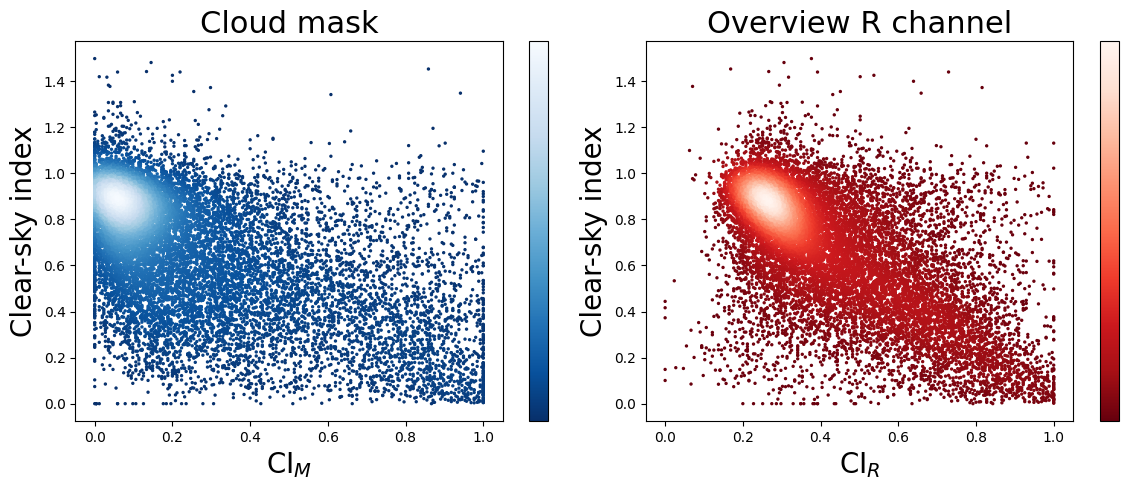

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

scatter_df = df[['CI','R','k']].sample(15000).copy()
scatter_df = scatter_df[scatter_df['k'] < 1.5]
scatter_df['CI'] = scatter_df['CI']/255
scatter_df['R'] = scatter_df['R']/255

# plot scatter plot 2 columns using subplots in plotly

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for CI vs k
xy_ci = np.vstack([scatter_df['CI'],scatter_df['k']])
colormapping_ci = gaussian_kde(xy_ci)(xy_ci)
scatter_ci = ax[0].scatter(scatter_df['CI'], scatter_df['k'], s=2 ,c=colormapping_ci, cmap='Blues_r')
ax[0].set_xlabel('$\mathrm{CI}_M$', fontsize=20)
ax[0].set_ylabel('Clear-sky index', fontsize=20)
ax[0].set_title('Cloud mask', fontsize=22)

# Scatter plot for R vs k
xy_r = np.vstack([scatter_df['R'],scatter_df['k']])
colormapping_r = gaussian_kde(xy_r)(xy_r)
scatter_r = ax[1].scatter(scatter_df['R'], scatter_df['k'], s=2, c=colormapping_r, cmap='Reds_r',
                          rasterized=True) # norm=plt.Normalize(0, 1)
ax[1].set_xlabel('$\mathrm{CI}_R$', fontsize=20)
ax[1].set_ylabel('Clear-sky index', fontsize=20)
ax[1].set_title('Overview R channel', fontsize=22)

# set colorbar
cbar_ci = fig.colorbar(scatter_ci)
cbar_ci.set_ticks([])
cbar_r = fig.colorbar(scatter_r)
cbar_r.set_ticks([])
plt.tight_layout()

# save figure in pdf
# plt.savefig('/Users/nuttamon/Documents/project/solar_map/figure/scatter_CI_k.pdf',  dpi=100, bbox_inches='tight')
plt.show()


## Model selection on validation data set

We perform model selection by validating the performance across 15 models

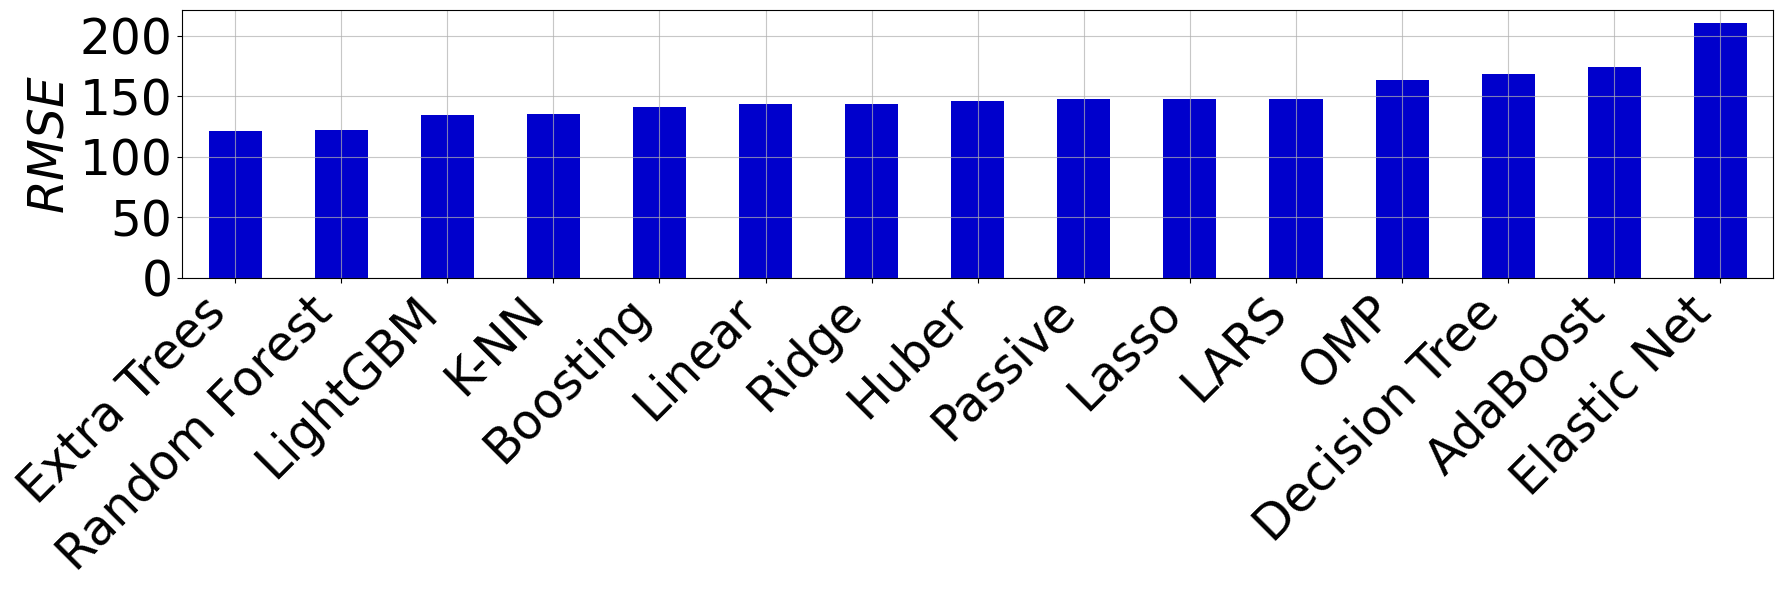

In [8]:
# Replace 'input.csv' with your input CSV file and 'output.csv' with the desired output file
input_file_path = 'cross_valid_shorten.csv' 

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file_path)

# Rearrange the columns as needed
# Example: Assuming columns 'A', 'B', 'C', 'D' are present, and you want 'C', 'A', 'B', 'D' order
df = df.sort_values(by=['RMSE'])

Model_list = list(df['Model']) 
RMSE_list =  list(df['RMSE'])

#my_colors = ['r', 'b']*5 # <-- this concatenates the list to itself 5 times.
#my_colors = [(0.5,0.4,0.5), (0.25, 0.25, 0.25)]*5 # <-- make two custom RGBs and repeat/alternate them over all the bar elements.
my_colors = [(x/15.0, x/15.0, 0.8) for x in range(15)] # <-- Quick gradient example along the Red/Green dimensions.
 
 
ax = df[['RMSE']].plot(kind='bar',  figsize=(18, 6), fontsize=35, legend=False, color=my_colors)  
ax.set_yticks(np.arange(0,225,50))
ax.set_xticklabels(Model_list, rotation=45, ha="right")
ax.set_ylabel("$RMSE$", fontsize=35)
ax.grid(which = 'minor', alpha = 0.3)
ax.grid(which = 'major', alpha = 0.7) 
plt.tight_layout()
# plt.savefig("auto_ML_valid.png")
# plt.savefig("auto_ML_valid.pdf") 
plt.show()